# Linear regression with Tensorflow 

## Correlating Popularity and Probability of Death with Tensorflow in GOT Dataset

In [22]:
'''A linear regression learning algortihm example'''
'''Case of use : Gema Parreño'''

'Case of use : Gema Parre\xc3\xb1o'

In [23]:
#Import useful statements
from __future__ import print_function
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random
import pandas as pd

In [24]:
#Load and read the data 

data = pd.read_csv('/home/gparreno/DataScience/PyDataBCN/GOT_DataSet .csv')


In [25]:
# Parameters

learning_rate = 0.1
training_epochs = 100
display_step = 50


In [26]:
# Training Data 

train_X = data.as_matrix(columns=data.columns[4:5])
train_Y = data.as_matrix(columns=data.columns[24:25])
n_samples = train_X.shape[0]

In [27]:
n_samples

1946

In [28]:
#tf Graph Input

X = tf.placeholder(tf.float32, name = 'X')
Y = tf.placeholder(tf.float32, name = 'Y')

In [29]:
#Set model weights
#randn give a distribution from standarized normal distribution
#mormal takes more parameters for more control 

W = tf.Variable(rng.normal(), name="weight")
b = tf.Variable(rng.normal(), name="bias")


In [30]:
# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

In [31]:
#Mean squared error and Gradient descent optimizer 
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
#Minimize minimizes W and b because Variable objects are trainable=True by default
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [32]:
#Initializing the variables
init = tf.global_variables_initializer()


Training finished!
Training cost= 0.0376453 W= -0.280614 b= 0.180421 



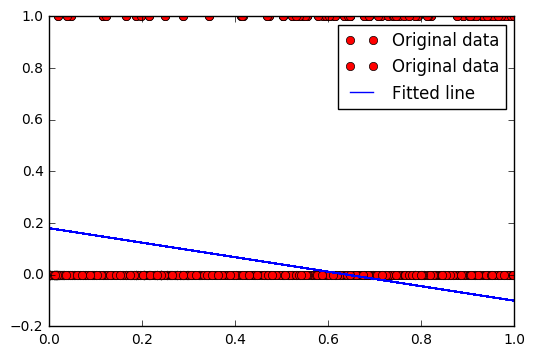

In [56]:
#with tf.Session() as sess:
    #sess.run(init)
def eval_model():
    sess = tf.Session()
    sess.run(init)
    #Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})
    
    print("Training finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')
    
    # Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()
    sess.close()
eval_model()